In [314]:
import numpy as np
import matplotlib.pyplot as plt

In [315]:
TData = np.loadtxt("Temperature.txt")

In [316]:
t = np.asarray(TData[:, 0] / 1000)
T = np.asarray(TData[:, 1])
t -= 1
Tref = np.linspace(300.0, 300.0, 594)

Text(0.5, 1.0, "Evolution of system's instant temperature vs. time")

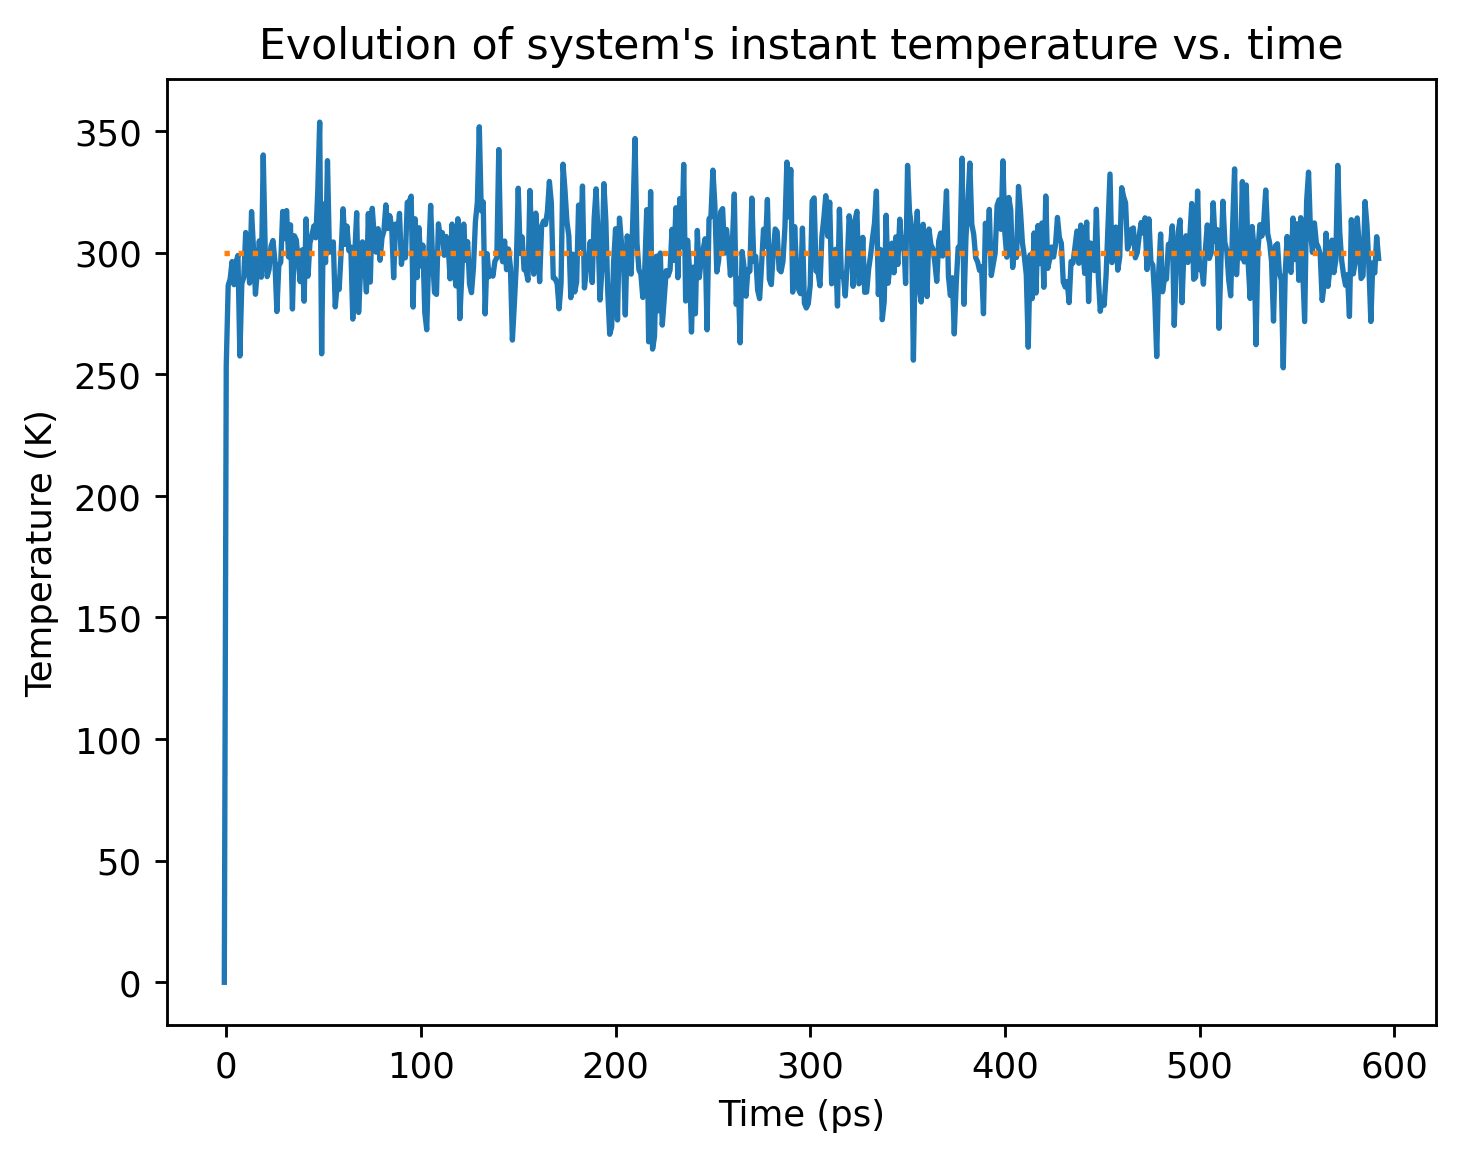

In [317]:
fig, ax = plt.subplots(dpi=256)
ax.plot(t, T)
ax.plot(t, Tref, linestyle=':')
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Temperature (K)")
ax.set_title("Evolution of system's instant temperature vs. time")

Text(0.5, 1.0, 'Potential Energy of system vs. time')

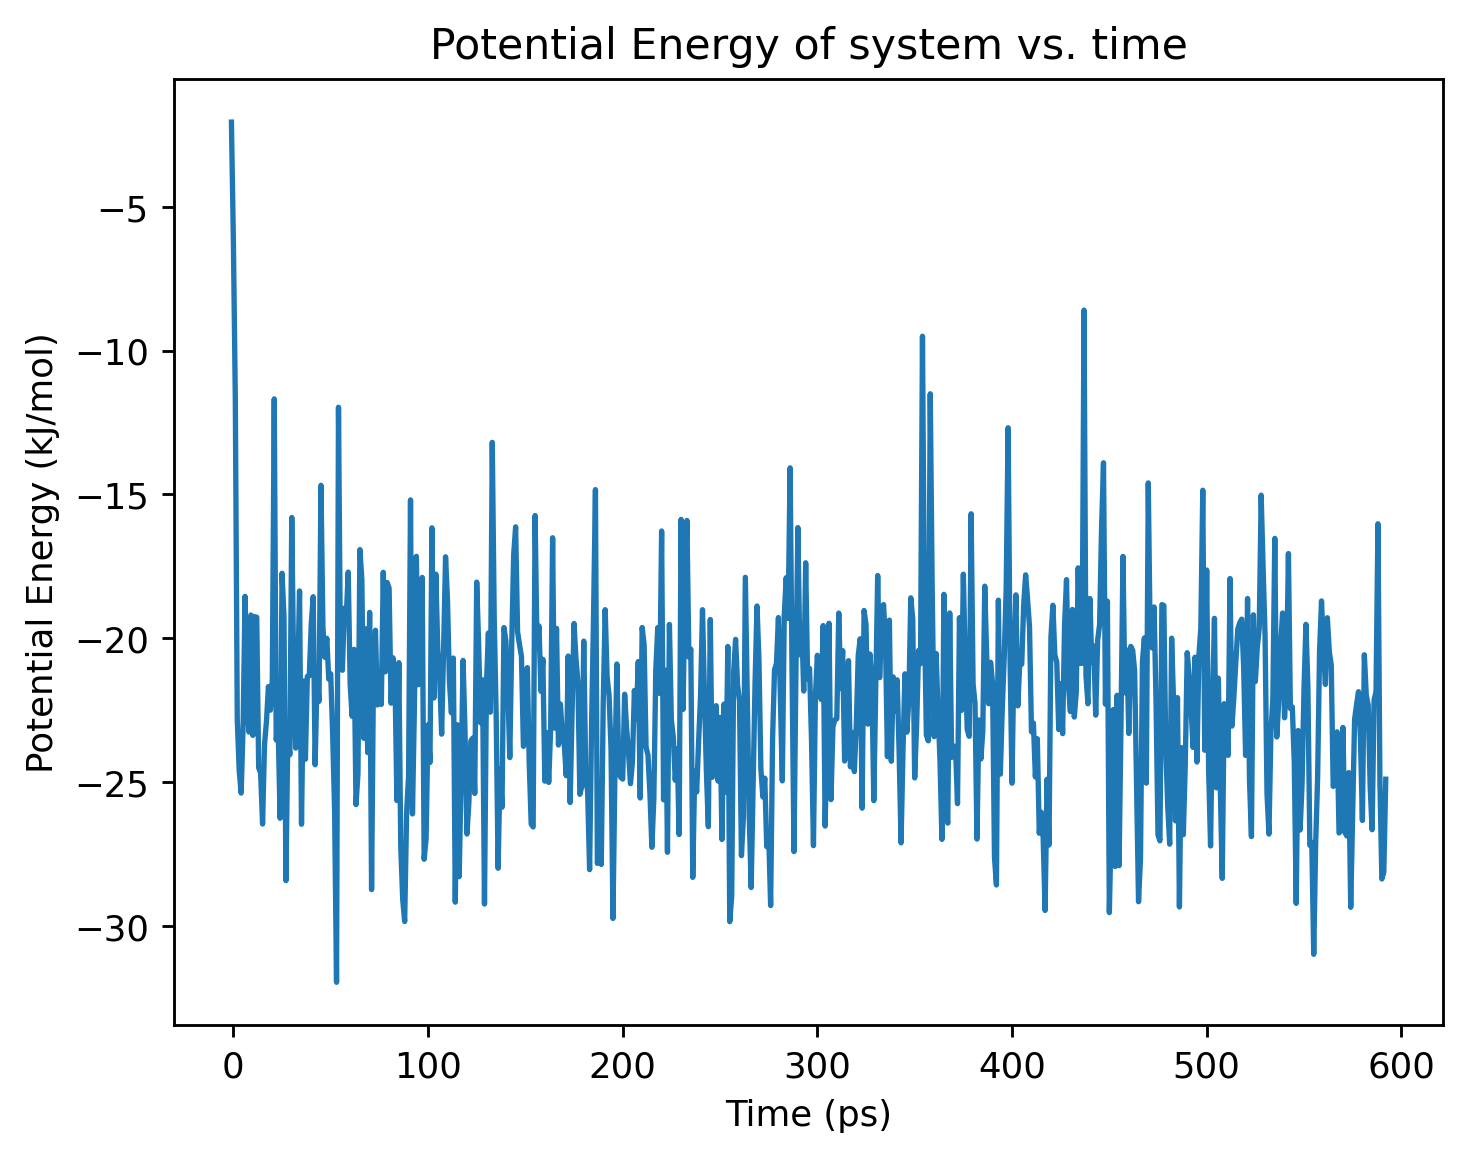

In [318]:
PEProd = np.loadtxt("Potential Energy Prod.txt")
fig, ax = plt.subplots(dpi=256)
ax.plot(t, PEProd)
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Potential Energy (kJ/mol)")
ax.set_title("Potential Energy of system vs. time")

Text(0.5, 1.0, 'Potential Energy of system vs. time')

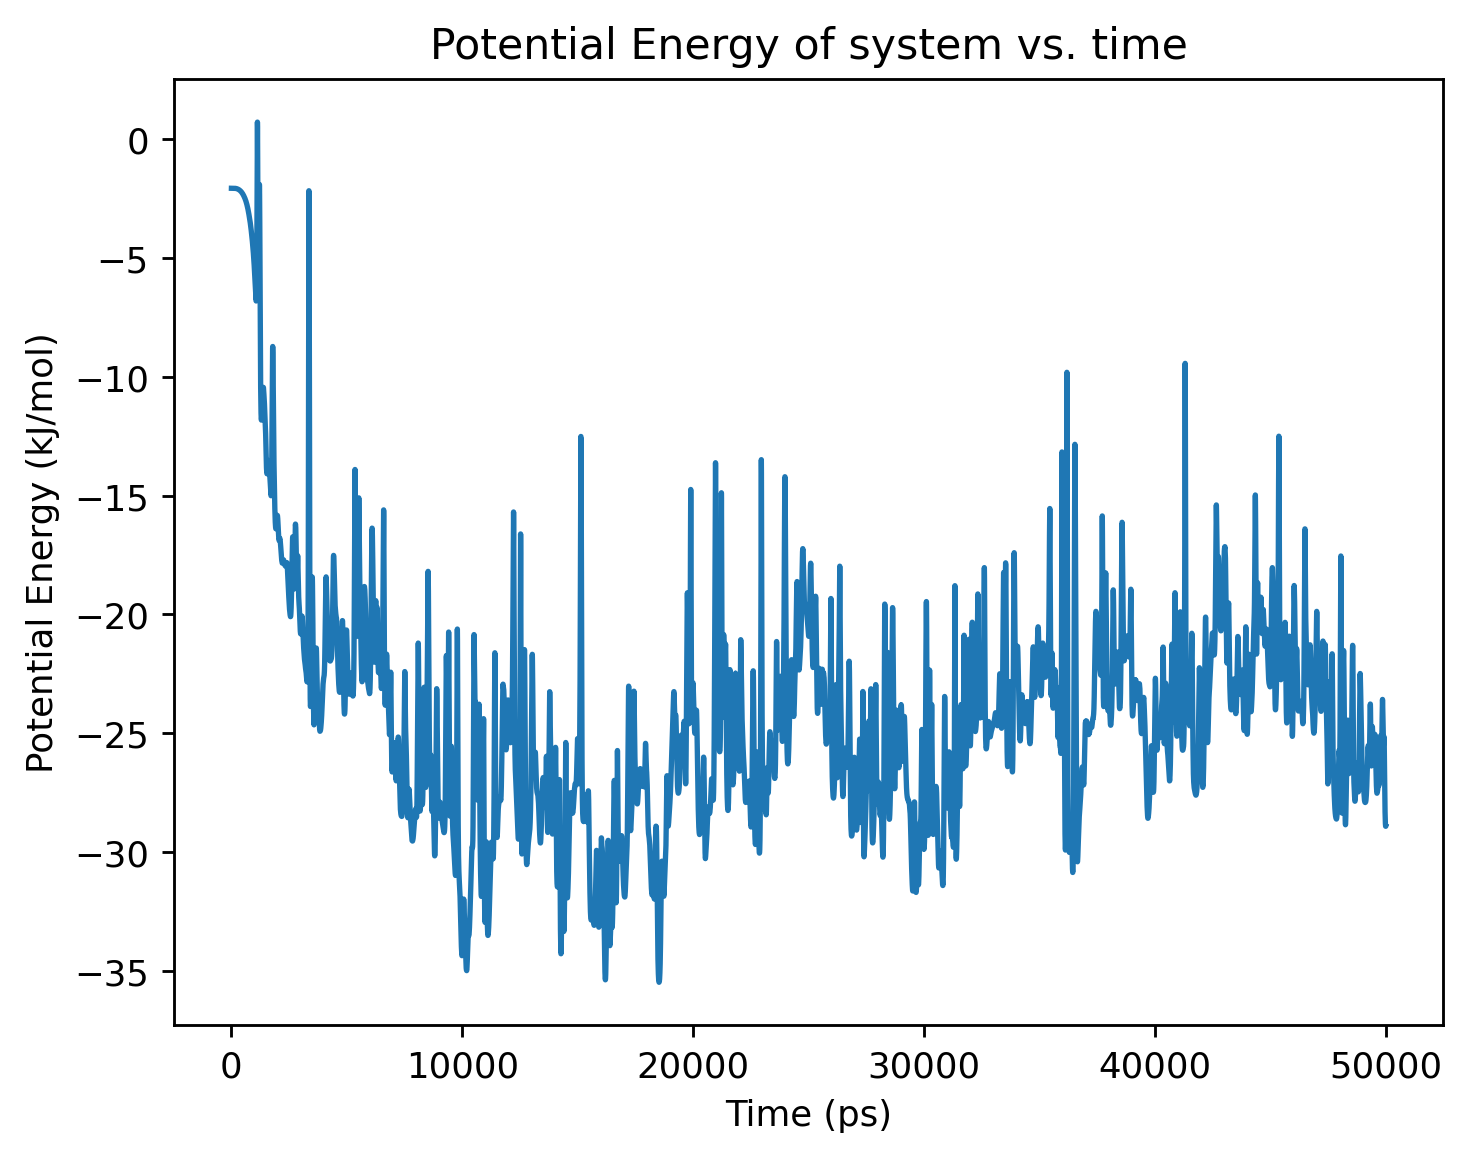

In [319]:
PETest = np.loadtxt("Potential Energy Test.txt")
t2 = np.linspace(0, 49999, 50000)
fig, ax = plt.subplots(dpi=256)
ax.plot(t2, PETest)
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Potential Energy (kJ/mol)")
ax.set_title("Potential Energy of system vs. time")

In [320]:
AvgPE = np.mean(PETest[5000:])
print(AvgPE)

-25.244054673555556


Text(0.5, 1.0, "Evolution of system's instant temperature vs. time")

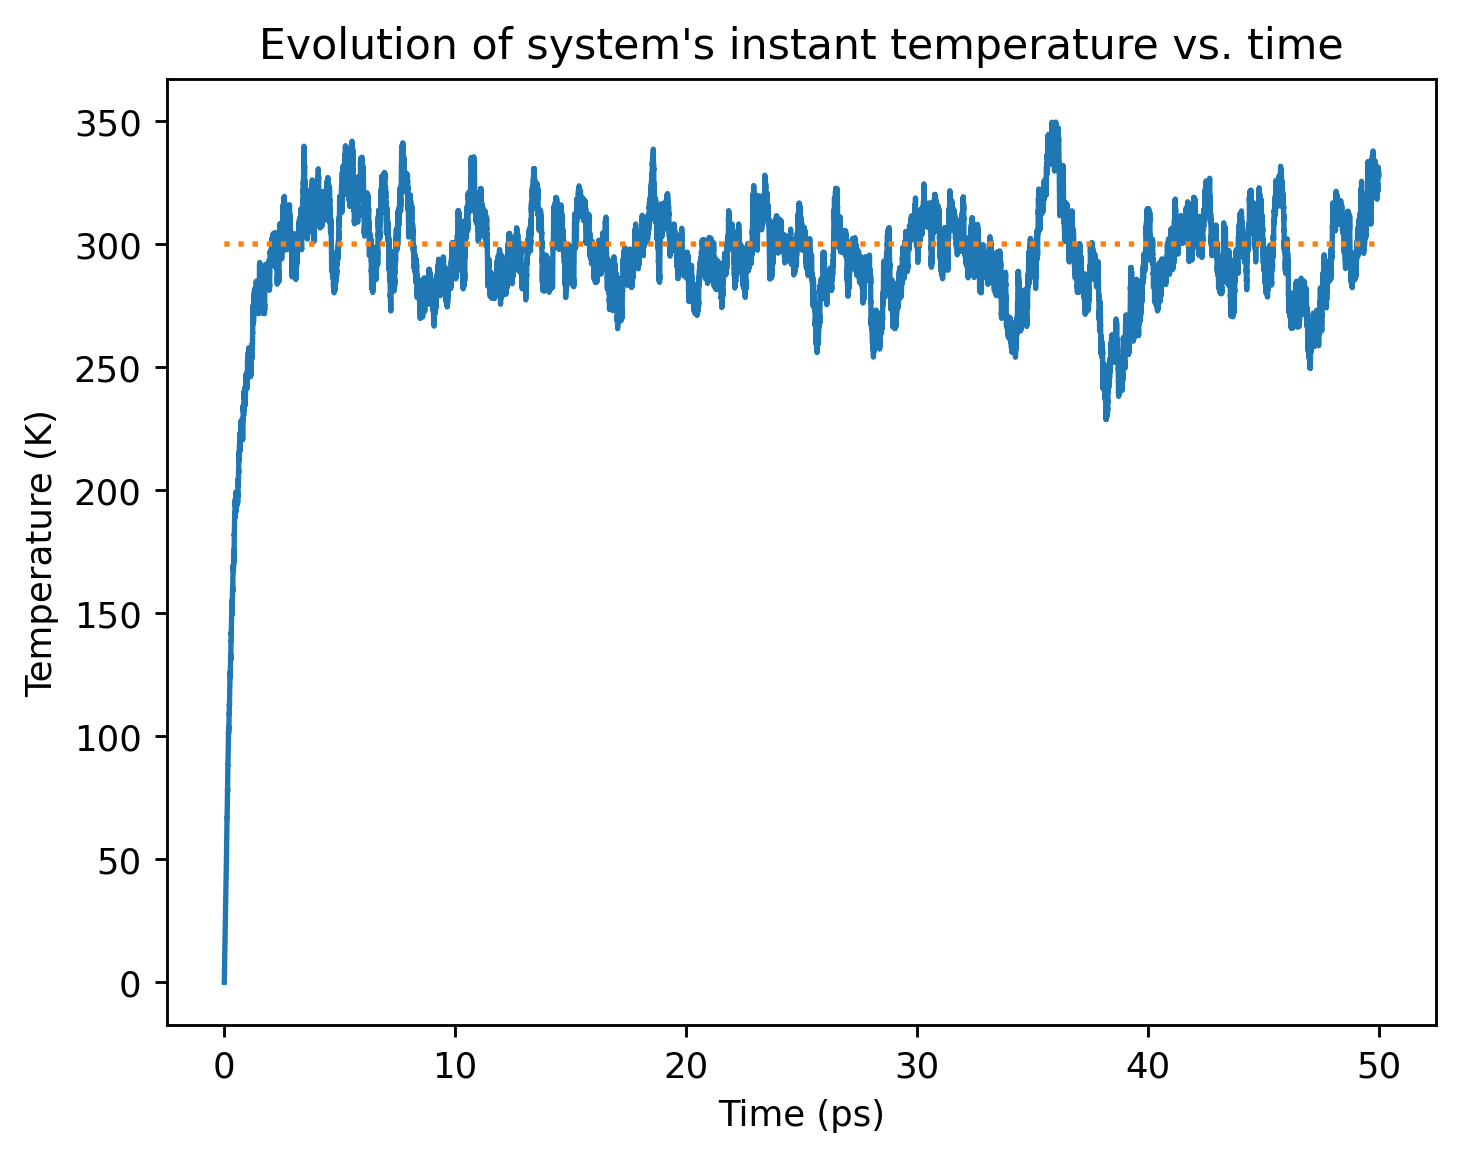

In [321]:
TDataTest = np.loadtxt("TemperatureTest.txt")
t2 = np.asarray(TDataTest[:, 0] / 1000)
T2 = np.asarray(TDataTest[:, 1])
t -= 1
Tref2 = np.linspace(300.0, 300.0, 50000)
fig, ax = plt.subplots(dpi=256)
ax.plot(t2, T2)
ax.plot(t2, Tref2, linestyle=':')
ax.set_xlabel("Time (ps)")
ax.set_ylabel("Temperature (K)")
ax.set_title("Evolution of system's instant temperature vs. time")

Time correlation function $C_{UU}(t)$

In [322]:
AvgPE = np.mean(PEProd[10:550])
print(AvgPE, AvgPE * AvgPE)

-22.164556833333336 491.26757961806345


Text(0.5, 1.0, 'Time correlation function of internal energy')

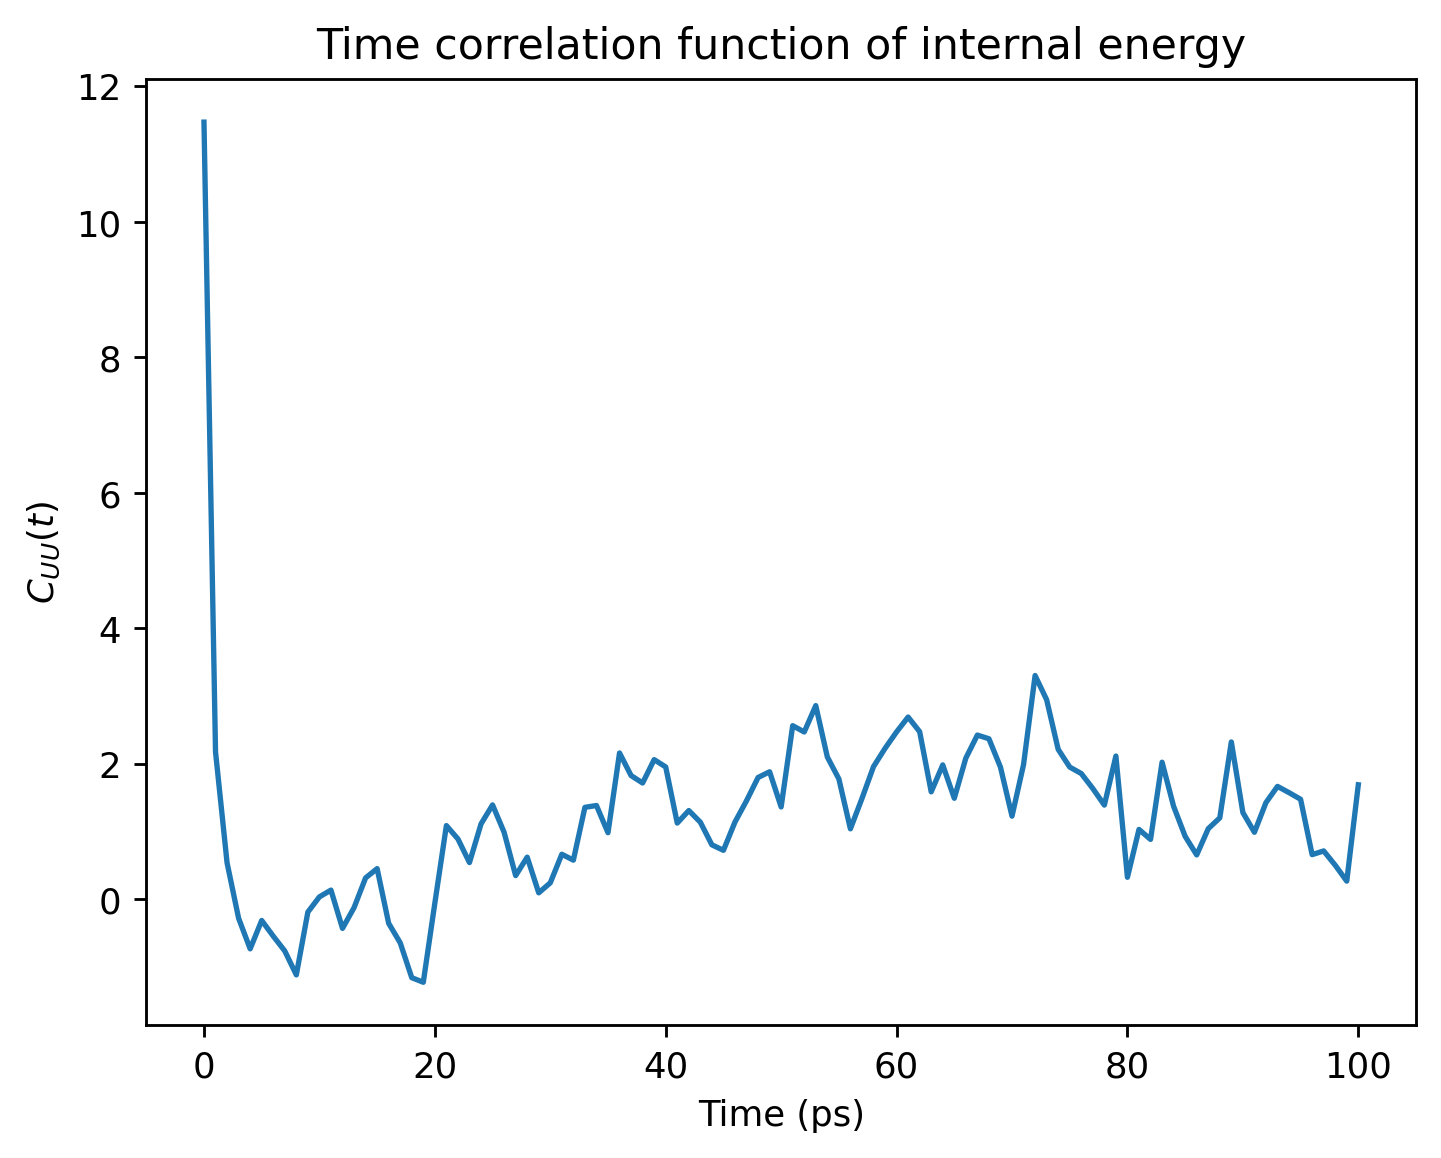

In [323]:
CUU = np.loadtxt("Time correlation function.txt")
t3 = np.linspace(0, len(CUU) - 1, len(CUU))
fig, ax = plt.subplots(dpi=256)
ax.plot(t3, CUU - AvgPE * AvgPE)
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"$C_{UU}(t)$")
ax.set_title("Time correlation function of internal energy")


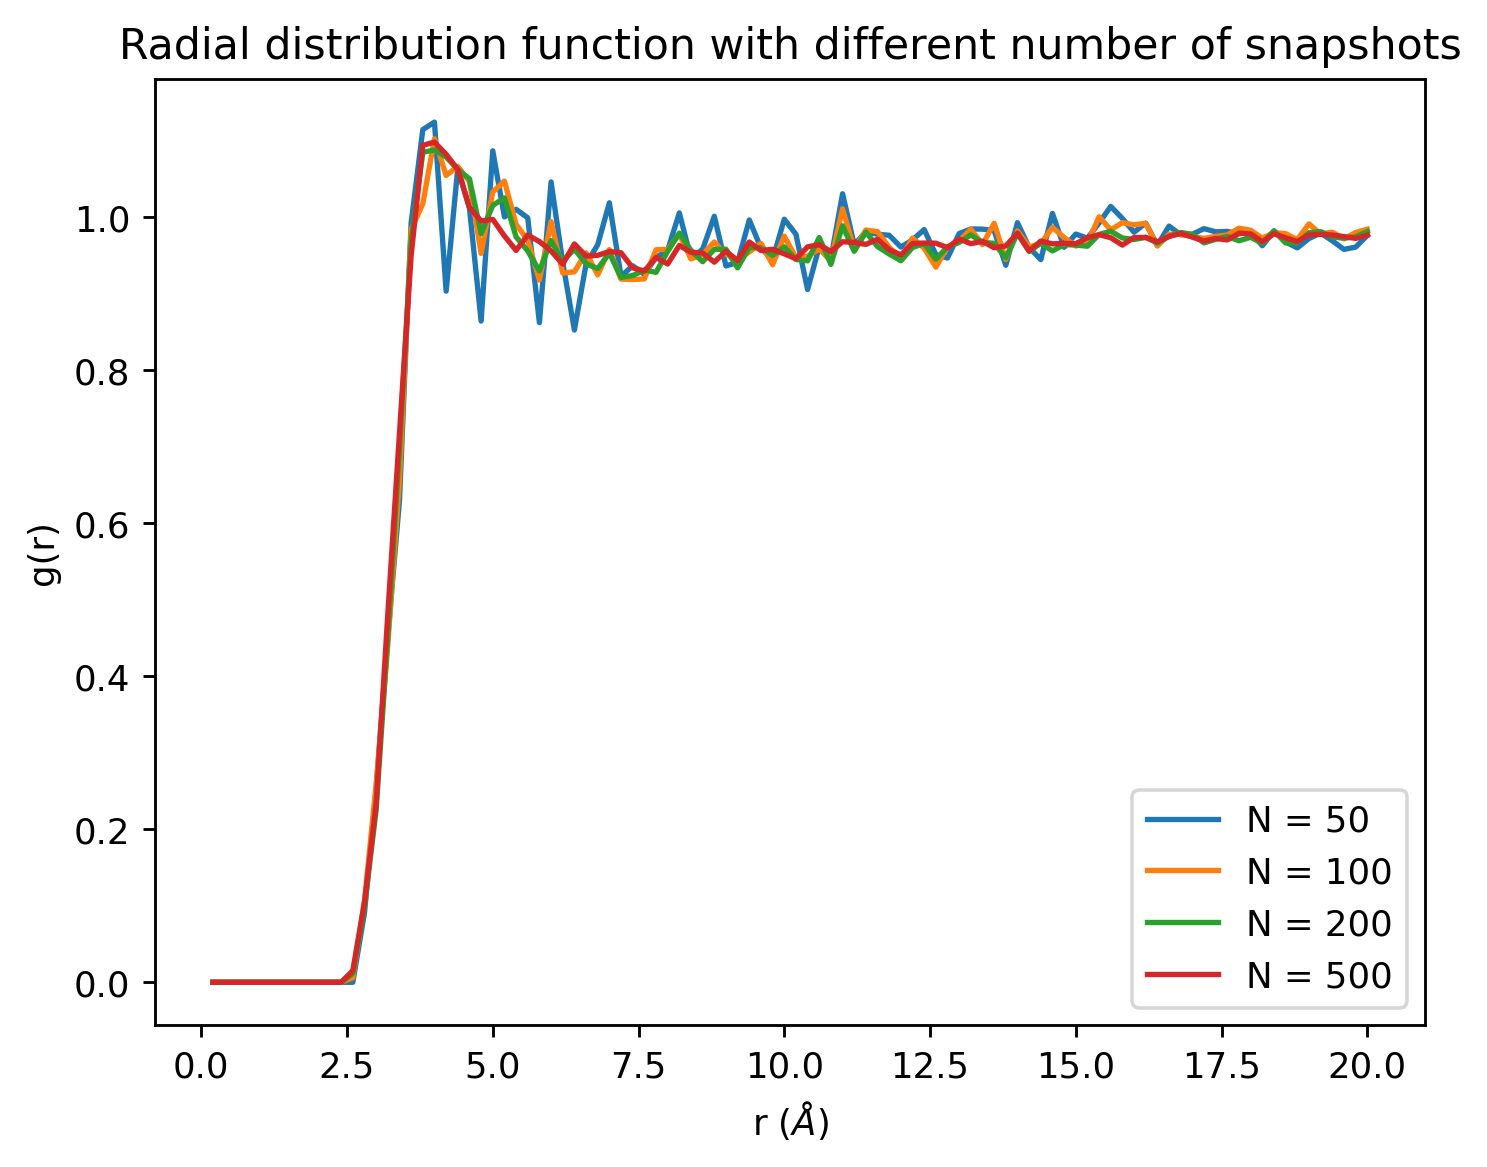

In [324]:
r = np.linspace(0.2, 20.0, 100)
rdfs = np.loadtxt("rdf different nSnapshots.txt")
fig, ax = plt.subplots(dpi=256)
NList = [50, 100, 200, 500]
for i in range(1, 5):
    ax.plot(r, rdfs[:, i], label=f"N = {NList[i-1]}")
ax.set_xlabel(r"r ($\AA$)")
ax.set_ylabel(r"g(r)")
ax.set_title("Radial distribution function with different number of snapshots")
plt.legend()

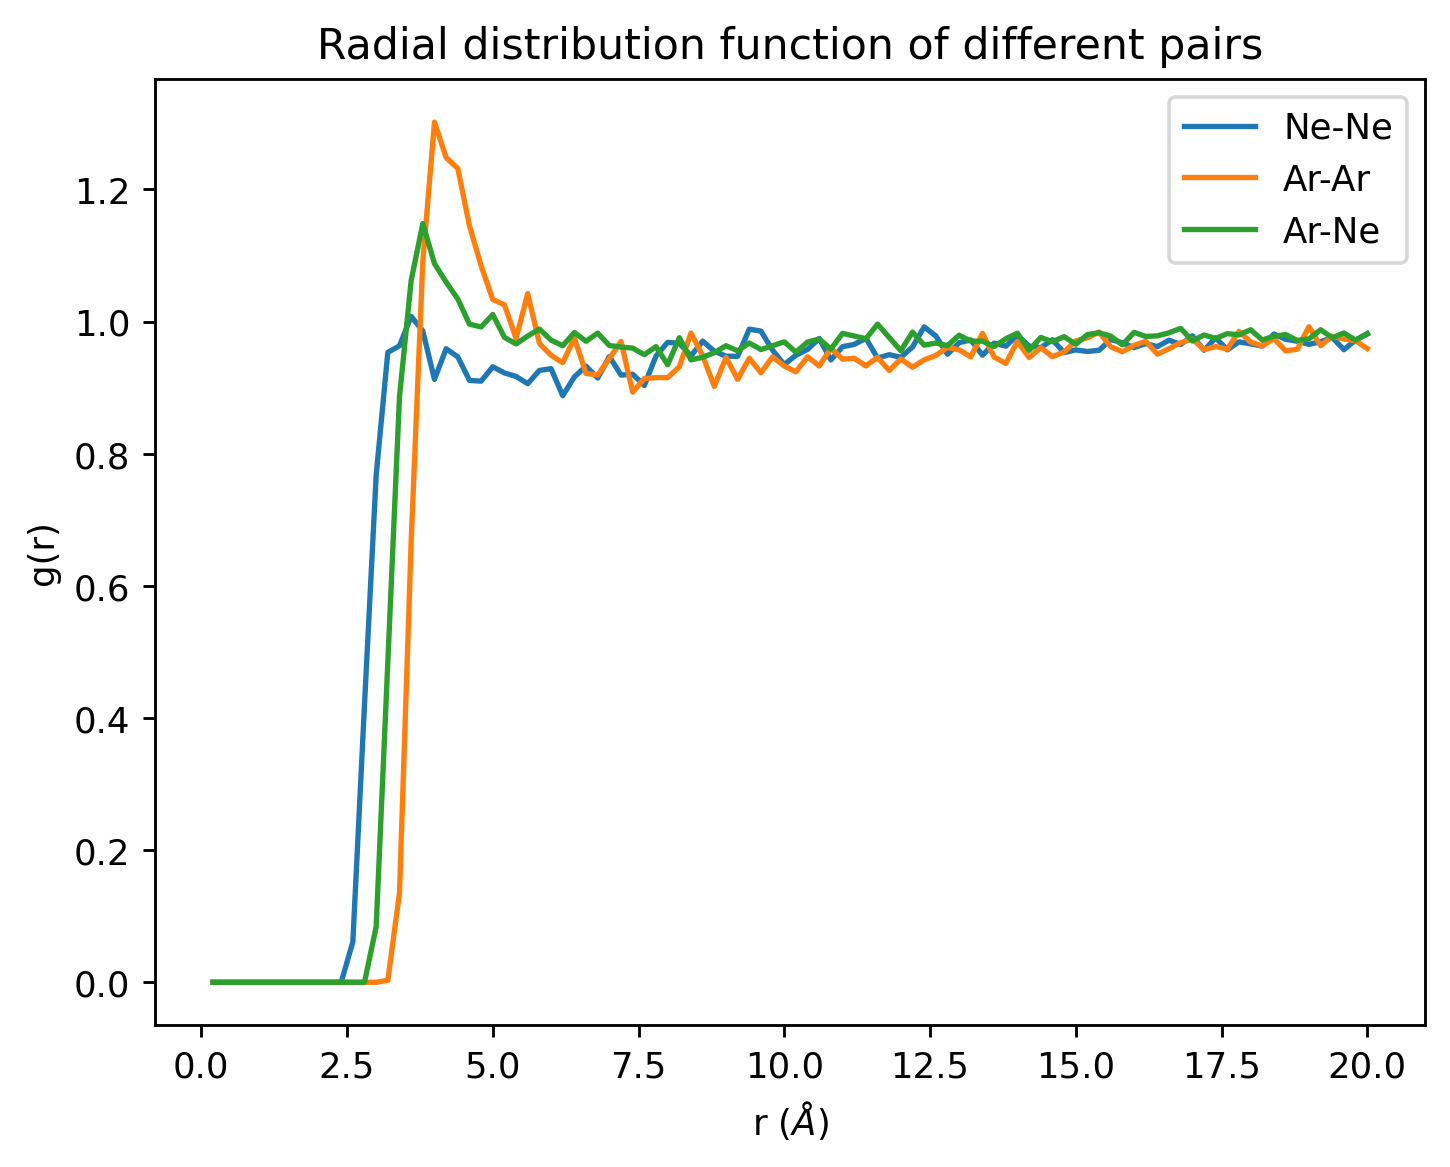

In [325]:
rdfs = np.loadtxt("rdf different types.txt")
fig, ax = plt.subplots(dpi=256)
TypeList = ["Ne-Ne", "Ar-Ar", "Ar-Ne"]
for i in range(3):
    ax.plot(r, rdfs[:, i], label=TypeList[i])
ax.set_xlabel(r"r ($\AA$)")
ax.set_ylabel(r"g(r)")
ax.set_title("Radial distribution function of different pairs")
plt.legend()

In [326]:
def LJ(r):
    eps1 = np.sqrt(0.9977 * 0.3100)
    sig1 = 0.5 * (0.32 + 0.2782)
    eps2 = 0.9977
    sig2 = 0.32
    v1 = eps1 * ((sig1 / r)**12.0 - (sig1 / r)**6.0)
    v2 = eps2 * ((sig2 / r)**12.0 - (sig2 / r)**6.0)
    return max(v1, v2)

In [327]:
print(LJ(0.24))

25.890949637683246


216.01120719178084


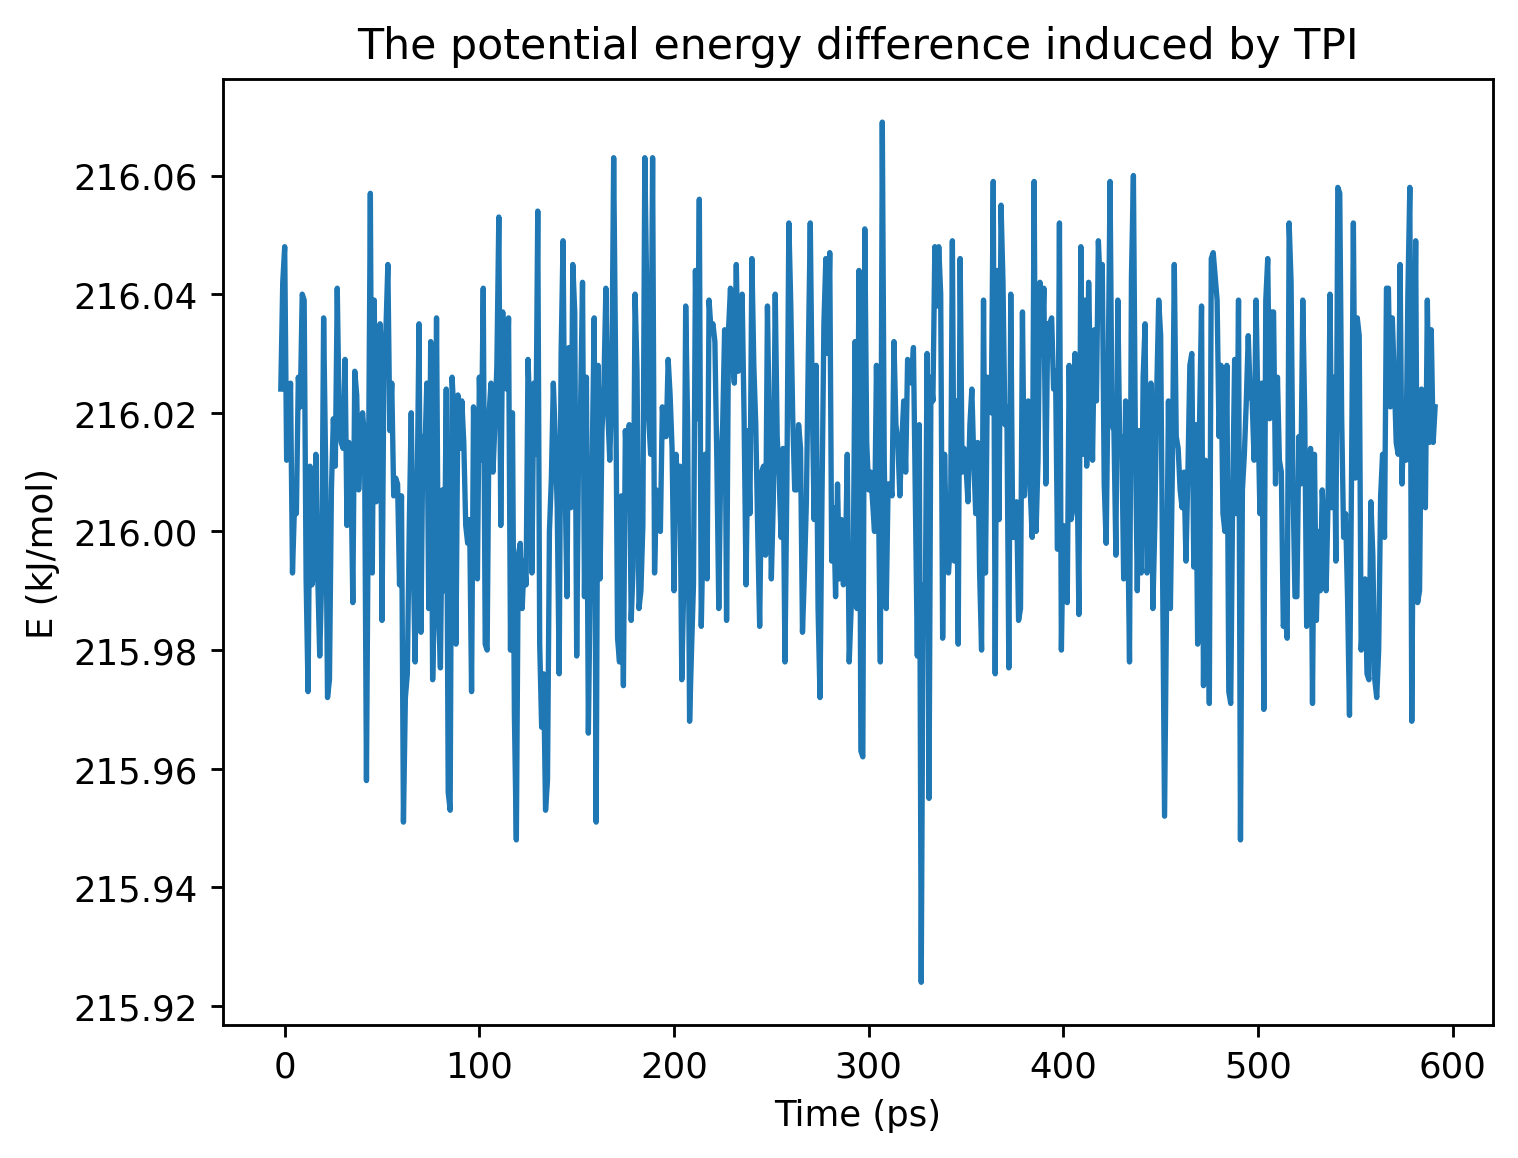

In [328]:
dEList = np.loadtxt("Delta E of TPI.txt")
fig, ax = plt.subplots(dpi=256)
ax.plot(t, dEList)
ax.set_xlabel(r"Time (ps)")
ax.set_ylabel(r"E (kJ/mol)")
ax.set_title("The potential energy difference induced by TPI")
dE = np.mean(dEList[10:])
print(dE)

Text(0.5, 1.0, '$\\left<\\exp\\left(-\\beta\\Delta U\\right)\\right>$ vs. $N_{Snapshots}$')

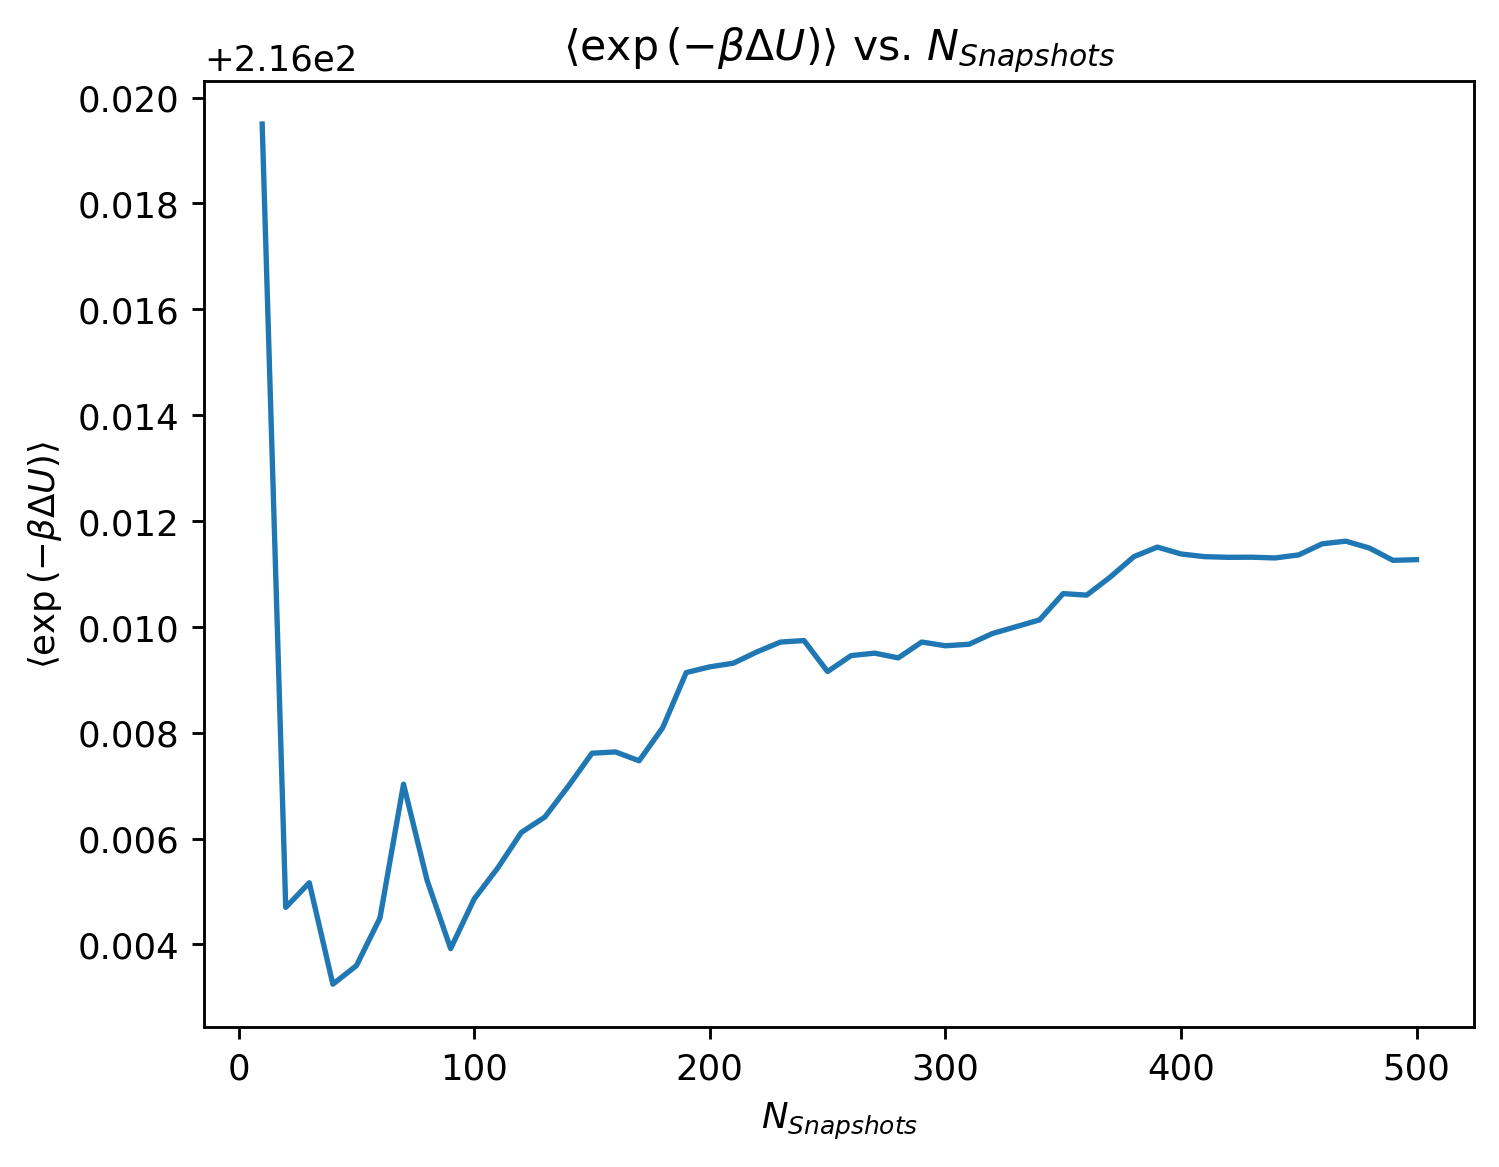

In [329]:
NSnapshots=[i*10 for i in range(1,51)]
avgBEde=[]
for i in range(len(NSnapshots)):
    avgBEde.append(np.mean(dEList[50:50+NSnapshots[i]]))
fig, ax = plt.subplots(dpi=256)
ax.plot(NSnapshots,avgBEde)
ax.set_xlabel(r"$N_{Snapshots}$")
ax.set_ylabel(r"$\left<\exp\left(-\beta\Delta U\right)\right>$")
ax.set_title(r"$\left<\exp\left(-\beta\Delta U\right)\right>$ vs. $N_{Snapshots}$")

In [331]:
print(avgBEde[-1])

216.01127


In [334]:
RT=8.3145*300.0/1000.0
kT=1.380649e-23*300.0
NA=6.02214e23
m=(39.948/1000.0)/NA
h=6.626e-34
lbd=np.sqrt((h*h)/(kT*2*np.pi*m))
print(lbd)
V=(6.0e-9)**3.0
muIG=-RT*np.log(V/(109*lbd*lbd*lbd))

1.5947298810944732e-11


In [335]:
print(muIG)

-32.67430874285225


In [339]:
mur=-RT*np.log(216.01127)
print(mur)

-13.407955837832732


In [340]:
print(2e-22*NA/1000)

0.1204428
